# Lecture 09 - The Lithium Ion Battery
---

## 1. Overview

A "lithium" ion battery refers in general to any system where lithium is both the only intentionally redox active ion in the system but there exist no bulk elemental lithium intentionally within the system, rather the reactions take the form

Upon discharge at the negative electrode:

$ Li_{o}X \rightarrow Li_{o-x}X + xLi^+ + xe^-  $

Upon discharge at the positive electrode:

$ Li_{p-y}Y  + yLi^+ + ye^- \rightarrow Li_{p}Y $

where 
- $X$ represents the negative host
- $Y$ represents the positive host
- $o$ represents "charged" non-stoichiometry of the negative host
- $p-y$ represents "charged" non-stoichiometry of the positive host
- $o-x$ represents "discharged" non-stoichiometry of the negative host
- $p$ represents "discharged" non-stoichiometry of the positive host

The variables represent a wide range of potential hosts and values, respectively, and are a simple abstraction of the wide range of opportunities and challenges of the lithium ion system.


## 2. A Brief History

When we refer to "lithium batteries" or "lithium metal batteries" we generally refer to cells in which lithium is only ion reacting (not always though), and lithium exists in the pure element state at the negative such that

Upon Discharge:

$Li \rightarrow Li^+ + e^-$

So why do we bother with a host rather than the pure phase? The short answer is for many of the reasons we covered in the last lecture that illustrated problems with the secondary zinc electrode.

While all lithium ion batteries have an SEI, the challenge the SEI on lithium is well illustrated below From ([Peng 2010](http://pubs.rsc.org/-/content/articlehtml/2016/ta/c5ta10050j))

![SEI on Li is really bad](imgs/10.1039-C5TA10050J.png)

Assuming there are no short circuit or catastrophic events, this is still a bad thing? Why?

Well:

In [1]:
import sys
sys.path.append("/pithy/code")
from pithy import *
%matplotlib inline

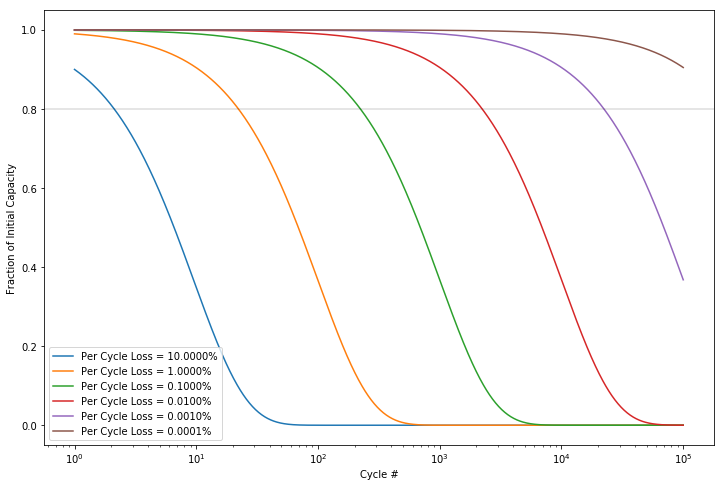

In [2]:
figure(figsize=(12,8))
a      = logspace(0,5,1000) #let's make 1e6 cycles
losses = logspace(-1,-6,6) #let's lose in orders of 10
for loss in losses:
    plot(a,(1-loss)**a,label="Per Cycle Loss = %.4f%%"%(loss*100) )
axhline(y=.8,color='k',linewidth=.2)
legend(loc='best')
ylabel("Fraction of Initial Capacity")
xlabel("Cycle #")
semilogx()
show()

So the fade of the battery to first order follows

$$C(cycle) = C_0 loss^{cycle}$$

Where $C_0$ is the initial capacity.

There are other challenges in lithium metal batteries, but the cycle stability and capacity loss is the first order challenge that must be solved before safety issues can be addressed.


## 3. Common Lithium Electrolytes

### 3.1 Primary Solvents

Due to the exceptional reducing power of Li

$Li \rightarrow Li^+ + e^-$ @ -3 V vs. SHE

Lithium metal nor most effective lithium ion negative hosts cannot directly touch our standard electrolyte solvent, water

In [12]:
from IPython.display import HTML
# Youtube
url = "8ypUVpwgcAA"
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/%s?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>' % url)


So water is out. It turns out, as we saw in our treatment of the SEI, _everything_ interacts with lithium in its fully reduced state, so we have to depend on the reaction product to passivate rather than corrode the reaction surface. So how should we think about such products?

Well, let's step through this:

_Why_ does water react in the following way?

$Li (s) + H_2O (l) \rightarrow LiOH (aq) + \frac{1}{2}H_2 (g)$

All good, right? just a little $H_2$ formation. In the zinc case, this happened all the time, and we don't see zinc fires. So what gives?

Let's do the math.

In [13]:
delta_V_Li = -3.0 #V vs. SHE
F = 96847 #C/mol
n = 1 # electron per 1/2 H2(g) formed / 1 Li reacted
delta_G_Li = delta_V_Li * F * n
print "From lithium we release %.1f kJ/mol" % (delta_G_Li/1000)

delta_V_Zn = -0.76 #V vs. SHE
F = 96847 #C/mol
n = 2 # electron per 1/2 H2(g) formed / 1 Li reacted
delta_G_Zn = delta_V_Zn * F * n
print "From zinc we release %.1f kJ/mol" % (delta_G_Zn/1000)


From lithium we release -290.5 kJ/mol
From zinc we release -147.2 kJ/mol


So, we get roughly twice the energy released from lithium that we get from zinc. So why is lithium dangerous and zinc is not?

There are two reasons, and this enables use to Zinc in Water, but not Lithium

1. Kinetics of Reaction vs. Driving Force
2. Nature of the passivation layer


If 1 is fast and 2 is unstable, we produce significant $H_2$. Once this $H_2$ is produced, in the presence of an oxidizing agent ($O_2$), and heat, we get a flame.

$H_2 (g) + 1/2 O_2 (g) \rightarrow H_2O (l)$

While some of the lithium metal might directly react with oxygen, without the heat release from the vigorous water reaction, it is relatively slow.

In [14]:
url = "5w5ejK7xoA8"
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/%s?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>' % url)

So, when we design lithium battery electrolyte solvents, we look for not only the solubility of lithium salt in the solvent (the primary driver).  There are many, many papers on physical chemistry discussing the nature of this, but for lithium ion batteries the current standard solvent is ethylene carbonate/dimethyl carbonate (EC/DMC). 

Note that this organic solvent is combustible with an energy density similar to that of octane. There are potential electrolytes that are non-flammable (ionic liquids/room temperature molten salts), but the challenge with all known ionic liquids is that the passivation layer is not as good as that of EC/DMC, so even though it is "safer", it is not cycle stable. You should notice a recurring theme.

### 3.2 Salts

Like the solvent, the main goal of the salt is to provide a pathway to 

1. lithium ion transport
2. electrode stability

Again: the choices are endless, but for reasons for forming the best SEI at a reasonable cost, the salt of choice is $LiPF_6$. If cost is less of a concern, lithium bistrifluoromethanesulfonimidate (LiTFSI) provides a good layer. _Why_ it does is still an area of intense study

### 3.4 Additives

While the primary goal of the solvent and the salt exist to provide a 

### 3.5 Why so many choices -> The Solid Electrolyte Interphase Layer

Beyond this, we have the challenge of the SEI (the following is from [Aurbach 2001])(https://www.sciencedirect.com/science/article/pii/S0378775300004316):

![SEI Aubach](imgs/10.1016-S0378-7753-00-00431-6_figure_1.png)

This shows up like

![SEI EIS Aubach](imgs/10.1016-S0378-7753-00-00431-6_figure_2.png)





## 4. Common/Popular Positive Negative Electrodes

### 4.1 Graphitic Carbons

### 4.2 Silicon

### 4.3 Titanium Oxides

## 5. Cathodes

### 5.1 Graphitic Carbons

### 5.2 Silicon

### 5.3 Titanium Oxides